# Anotações da aula 6

## Vértice

In [14]:
class Vertex:
    def __init__(self, name): #construtor cria um vértice e define com uma lista vazia de vertices vizinhos
        self.name = name
        self.neighboards = list()
        
    def add_neighboard(self, neighboard): # Método que adiciona vizinho
        if not neighboard in self.neighboards:
            self.neighboards.append(neighboard)
            self.neighboards.sort()
            return True
        
        else:
            return False
        

## Grafo

In [15]:
class Graph:
    vertices = {}
    
    def add_vertice(self, vertex: Vertex):
        #verifica se o vértice já foi adicionado
        if vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            return True
        else:
            return False
        
    def add_edge(self, u,v):
        #Verifica se os vertices existem no grafo
        if u in self.vertices and v in self.vertices:
            
            for key, value in self.vertices.items():
                #adiciona um na lista de vizinhos do outro
                if key == u:
                    value.add_neighboard(v)
                if key == v:
                    value.add_neighboard(u)
            return True
        else:
            return False
        
    def print_graph(self):
        for key in sorted(list(self.vertices.keys())):
            print(key + str(self.vertices[key].neighboards))
    
    def dfs(self, start_vertex):
        visited = set()

        def dfs_recursive(vertex):
            visited.add(vertex)
            print(vertex)

            for neighbor in self.vertices[vertex].neighboards:
                if neighbor not in visited:
                    dfs_recursive(neighbor)

        dfs_recursive(start_vertex)


In [16]:
print(ord('A')) #retorna o codigo unicode para um char

65


In [17]:
g1 = Graph()
for i in range(ord('A'), ord('G')): #converte char para int
    g1.add_vertice(Vertex(chr(i))) #converte int para char e cria o vértice passando a letra

arestas = ['AB','AD','BC','CD','CE','CF']
for aresta in arestas:
    g1.add_edge(aresta[0], aresta[1])

g1.print_graph()

A['B', 'D']
B['A', 'C']
C['B', 'D', 'E', 'F']
D['A', 'C']
E['C']
F['C']


## Executando DFS

In [18]:
g1.dfs('C')

C
B
A
D
E
F


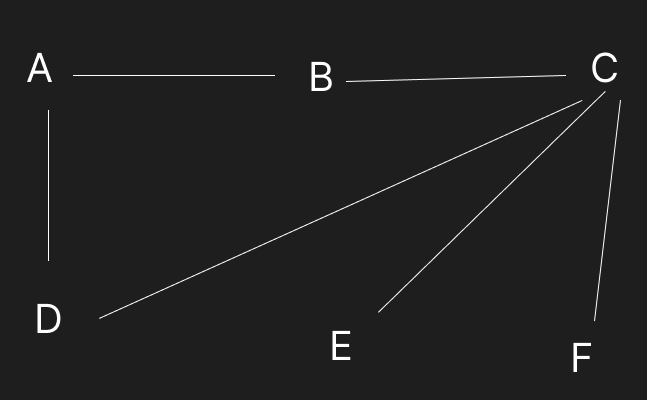

## ALGORITMO DE DIJKSTRA

In [22]:
class Graph_DIJKSTRA:
    def __init__(self):
        self.graph = {}  # Cria um dicionário para representar o grafo. As chaves são os vértices e os valores são listas de vizinhos com seus pesos.

    def add_edge(self, u, v, weight):  # Adiciona uma aresta com peso entre dois vértices.
        if u not in self.graph:  # Se o vértice u ainda não estiver no grafo, cria uma lista vazia para representar seus vizinhos.
            self.graph[u] = []
        self.graph[u].append((v, weight))  # Adiciona o vértice v e o peso da aresta na lista de vizinhos do vértice u.

        if v not in self.graph:  # Se o vértice v ainda não estiver no grafo, cria uma lista vazia para representar seus vizinhos.
            self.graph[v] = []
        self.graph[v].append((u, weight))  # Adiciona o vértice u e o peso da aresta na lista de vizinhos do vértice v.

    def dijkstra(self, start):  # Executa o algoritmo de Dijkstra para encontrar as distâncias mínimas a partir do vértice de partida.
        distances = {node: float('inf') for node in self.graph}  # Inicializa todas as distâncias como infinito, exceto a distância do vértice de partida que é definida como 0.
        distances[start] = 0

        visited = set()  # Cria um conjunto para armazenar os vértices visitados durante o algoritmo.
        while len(visited) < len(self.graph):  # Enquanto nem todos os vértices tiverem sido visitados...
            min_distance = float('inf')
            min_node = None

            for node in self.graph:
                if distances[node] < min_distance and node not in visited:  # Encontra o vértice não visitado com a menor distância atual.
                    min_distance = distances[node]
                    min_node = node

            visited.add(min_node)  # Marca o vértice atual como visitado.

            for neighbor, weight in self.graph[min_node]:  # Explora todos os vizinhos do vértice atual.
                new_distance = distances[min_node] + weight  # Calcula a nova distância a partir do vértice atual.
                if new_distance < distances[neighbor]:  # Se a nova distância for menor que a distância atual do vizinho, atualiza a distância mínima.
                    distances[neighbor] = new_distance

        return distances  # Retorna um dicionário contendo as distâncias mínimas a partir do vértice de partida.



# by chatgpt

In [23]:
# Exemplo de uso
graph = Graph_DIJKSTRA()

# Adicionando arestas com pesos
graph.add_edge('A', 'B', 5)
graph.add_edge('A', 'C', 3)
graph.add_edge('B', 'C', 2)
graph.add_edge('B', 'D', 6)
graph.add_edge('C', 'D', 7)
graph.add_edge('C', 'E', 4)
graph.add_edge('D', 'E', 1)

start_vertex = 'A'
distances = graph.dijkstra(start_vertex)

print(f"Distâncias mínimas a partir do vértice {start_vertex}:")
for vertex, distance in distances.items():
    print(f"Vértice: {vertex}, Distância: {distance}")
#by chatgpt

Distâncias mínimas a partir do vértice A:
Vértice: A, Distância: 0
Vértice: B, Distância: 5
Vértice: C, Distância: 3
Vértice: D, Distância: 8
Vértice: E, Distância: 7
